In [1]:
import tradingeconomics as te
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
date_now = (datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d')
raw_data = te.getMarketsIntraday(symbols=['indu:ind', 'NDX:ind'], initDate=date_now, output_type='df')

In [4]:
raw_dowjones = raw_data.loc[raw_data['Symbol'] == 'INDU:IND']
dowjones = raw_dowjones[['Date','Close']].rename(columns={'Close': 'INDU:IND'})

raw_nasdaq = raw_data.loc[raw_data['Symbol'] == 'NDX:IND']
nasdaq = raw_nasdaq[['Date','Close']].rename(columns={'Close': 'NDX:IND'})

df = pd.merge(dowjones, nasdaq, on='Date')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S')
df.set_index('Date', inplace=True)


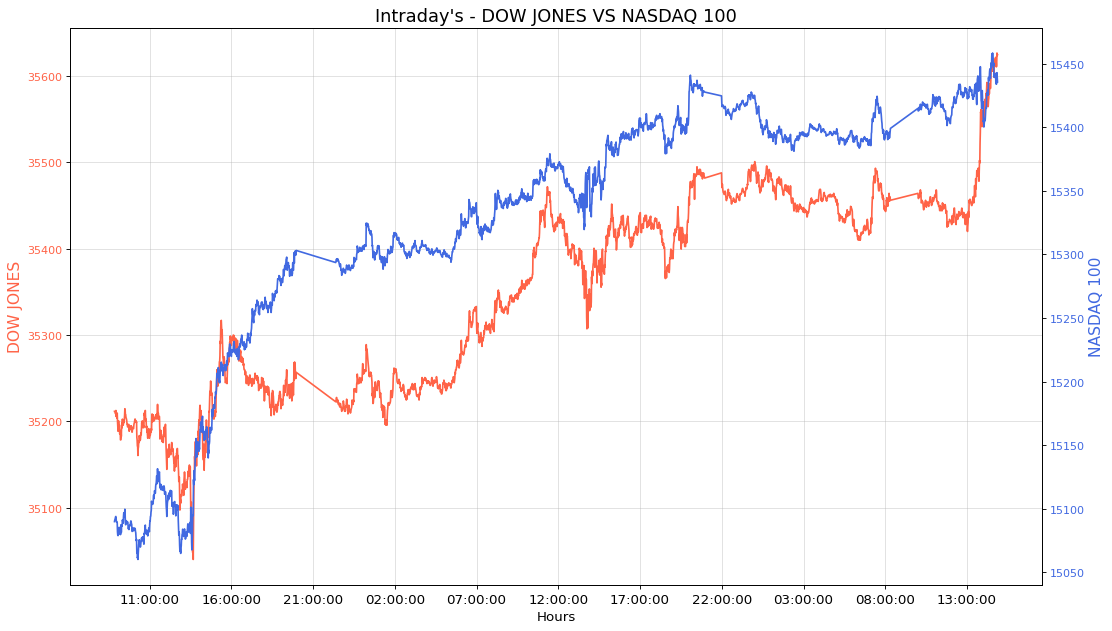

In [5]:
labels = df.index.tolist()
line1 = df['INDU:IND'].values.tolist()
line2 = df['NDX:IND'].values.tolist()

fig, ax1 = plt.subplots(1,1,figsize=(14,8), dpi= 80)
ax1.plot(labels, line1, color='tomato')

ax2 = ax1.twinx() 
ax2.plot(labels, line2, color='royalblue')

ax1.set_xlabel('Hours', fontsize=12)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('DOW JONES', color='tomato', fontsize=14)
ax1.tick_params(axis='y', rotation=0, labelcolor='tomato' )
ax1.grid(alpha=.4)

ax1.xaxis.set_major_locator(md.HourLocator(interval = 5))
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

ax2.set_ylabel("NASDAQ 100", color='royalblue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='royalblue')

ax2.set_title("Intraday's - DOW JONES VS NASDAQ 100", fontsize=16)
fig.tight_layout()
plt.show()